In [10]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn




<h4> Import required packages and read data</h4>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("/config/workspace/emotions/data/data.csv")


<h4>Describe data</h4>

In [5]:
 df.describe()

,text,emotions
count,17998,17998
unique,17956,6
top,i was so stubborn and that it took you getting...,joy
freq,2,6057


<h4>Observation:</h4>
<h5> * Number of rows: 17998</h5>
<h5> * Number of target categories :6</h5>

<h4>Check for nullvalues</h4>

In [6]:
df.isnull().sum()

text        0
emotions    0
dtype: int64

<h4>Observations:</h4>
<h5>* There is no nullvalues</h5>

In [7]:
df.head()

,text,emotions
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness


<h4>EDA</h4>
<h5>Target Analysis</h5>

(-1.25, 1.25, -1.25, 1.25)

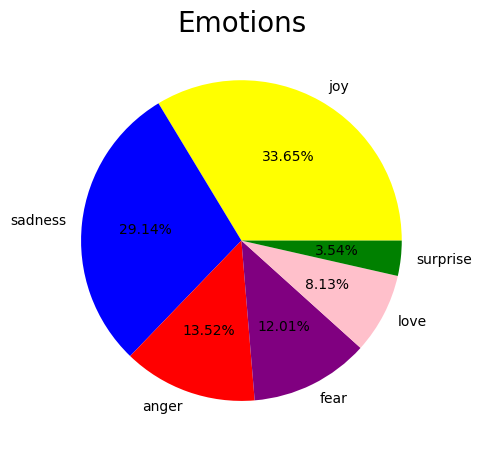

In [8]:
plt.rcParams['figure.figsize'] = (30,12)
plt.subplot(1,5,1)
size = df["emotions"].value_counts()
labels = "joy","sadness","anger","fear","love","surprise" 
color_names = ["Yellow", "Blue", "Red", "Purple", "Pink", "Green"]
plt.pie(size,labels = labels,colors = color_names,autopct = "%.2f%%")
plt.title("Emotions",fontsize = 20)
plt.axis("off")


<h4>Observations:</h4>
<h5>* We have an unbalenced dataset</h5>
<h5>* joy is the most frequent and surprise is less frequent</h5>

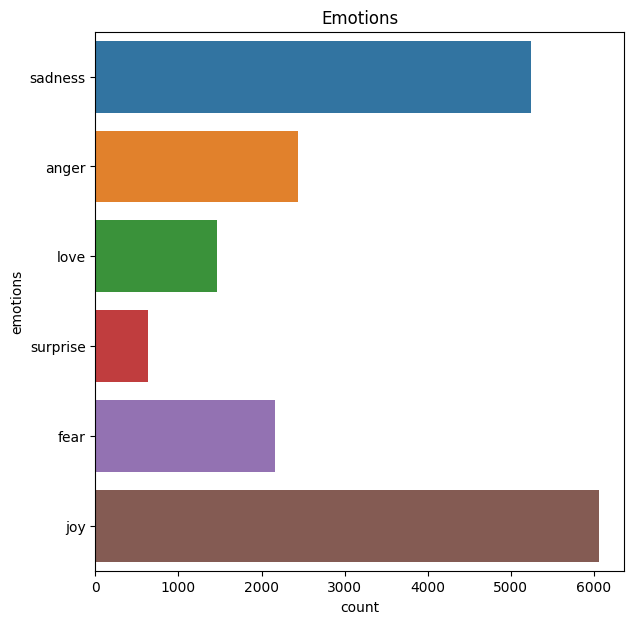

In [25]:
 fig,axs = plt.subplots(1,1,figsize = (15,7))
 plt.subplot(121)
 plt.title("Emotions")

 sns.countplot(y = df["emotions"],orient = "X")
 plt.show()

<h3>Preprocessing</>

In [27]:
!pip install nltk



     |████████████████████████████████| 1.5 MB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 70.4 MB/s eta 0:00:01
     |████████████████████████████████| 772 kB 63.0 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 9.0 MB/s  eta 0:00:01
     |████████████████████████████████| 96 kB 10.5 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


<h4>Import nlp packages</h4>

In [42]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
ps = SnowballStemmer(language = "english")
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /config/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<h5> Build a function for clean text data</h5>

In [45]:
def clean_text(text):
    result = re.sub("[^a-zA-Z]"," ",text)
    result = result.lower()
    result = result.split()
    result = [ps.stem(word) for word in result if word not in set(stopwords.words('english'))]
    result = " ".join(result)
    return result

<h5>Apply the clean_text function</h5>

In [46]:
df['cleaned_text'] = df["text"].apply(clean_text)

In [47]:
df.head()

,text,emotions,cleaned_text
0,i can go from feeling so hopeless to so damned...,sadness,go feel hopeless damn hope around someon care ...
1,im grabbing a minute to post i feel greedy wrong,anger,im grab minut post feel greedi wrong
2,i am ever feeling nostalgic about the fireplac...,love,ever feel nostalg fireplac know still properti
3,i am feeling grouchy,anger,feel grouchi
4,ive been feeling a little burdened lately wasn...,sadness,ive feel littl burden late wasnt sure


<h4>Feature extraction</h4>